In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
uxd = pd.read_html('https://www.zippia.com/user-experience-designer-jobs/demographics/')

In [3]:
len(uxd)

19

In [4]:
gender_breakdown = uxd[1]

In [5]:
gender_breakdown.head()

,Year,Male,Female
0,2010,61.88%,38.12%
1,2011,62.12%,37.88%
2,2012,61.35%,38.65%
3,2013,63.67%,36.33%
4,2014,61.60%,38.40%


In [6]:
gb_l = pd.melt(gender_breakdown,
               id_vars = ['Year'],
               value_vars = ['Male', 'Female'],
               var_name = 'sex',
               value_name = 'percent')

In [7]:
gb_l

,Year,sex,percent
0,2010,Male,61.88%
1,2011,Male,62.12%
2,2012,Male,61.35%
3,2013,Male,63.67%
4,2014,Male,61.60%
5,2015,Male,62.31%
6,2016,Male,61.25%
7,2017,Male,60.32%
8,2018,Male,62.43%
9,2019,Male,59.38%


In [8]:
gb_l = gb_l.astype({'sex': 'category', 'Year': 'category'})

In [9]:
gb_l

,Year,sex,percent
0,2010,Male,61.88%
1,2011,Male,62.12%
2,2012,Male,61.35%
3,2013,Male,63.67%
4,2014,Male,61.60%
5,2015,Male,62.31%
6,2016,Male,61.25%
7,2017,Male,60.32%
8,2018,Male,62.43%
9,2019,Male,59.38%


In [10]:
gb_l['percent'] = gb_l['percent'].str.rstrip('%').astype('float')

In [11]:
gb_l.head()

,Year,sex,percent
0,2010,Male,61.88
1,2011,Male,62.12
2,2012,Male,61.35
3,2013,Male,63.67
4,2014,Male,61.60


In [12]:
gbl_grouped = gb_l.groupby(['Year', 'sex'])

In [13]:
gbl_grouped.get_group((2014, 'Female'))

,Year,sex,percent
15,2014,Female,38.4


In [14]:
gbl_grouped.indices

{(2010, 'Female'): array([11], dtype=int64),
 (2010, 'Male'): array([0], dtype=int64),
 (2011, 'Female'): array([12], dtype=int64),
 (2011, 'Male'): array([1], dtype=int64),
 (2012, 'Female'): array([13], dtype=int64),
 (2012, 'Male'): array([2], dtype=int64),
 (2013, 'Female'): array([14], dtype=int64),
 (2013, 'Male'): array([3], dtype=int64),
 (2014, 'Female'): array([15], dtype=int64),
 (2014, 'Male'): array([4], dtype=int64),
 (2015, 'Female'): array([16], dtype=int64),
 (2015, 'Male'): array([5], dtype=int64),
 (2016, 'Female'): array([17], dtype=int64),
 (2016, 'Male'): array([6], dtype=int64),
 (2017, 'Female'): array([18], dtype=int64),
 (2017, 'Male'): array([7], dtype=int64),
 (2018, 'Female'): array([19], dtype=int64),
 (2018, 'Male'): array([8], dtype=int64),
 (2019, 'Female'): array([20], dtype=int64),
 (2019, 'Male'): array([9], dtype=int64),
 (2021, 'Female'): array([21], dtype=int64),
 (2021, 'Male'): array([10], dtype=int64)}

In [15]:
for i, o in gbl_grouped:
    print('name\n', i, '\ndata\n', o)

name
 (2010, 'Female') 
data
     Year     sex  percent
11  2010  Female    38.12
name
 (2010, 'Male') 
data
    Year   sex  percent
0  2010  Male    61.88
name
 (2011, 'Female') 
data
     Year     sex  percent
12  2011  Female    37.88
name
 (2011, 'Male') 
data
    Year   sex  percent
1  2011  Male    62.12
name
 (2012, 'Female') 
data
     Year     sex  percent
13  2012  Female    38.65
name
 (2012, 'Male') 
data
    Year   sex  percent
2  2012  Male    61.35
name
 (2013, 'Female') 
data
     Year     sex  percent
14  2013  Female    36.33
name
 (2013, 'Male') 
data
    Year   sex  percent
3  2013  Male    63.67
name
 (2014, 'Female') 
data
     Year     sex  percent
15  2014  Female     38.4
name
 (2014, 'Male') 
data
    Year   sex  percent
4  2014  Male     61.6
name
 (2015, 'Female') 
data
     Year     sex  percent
16  2015  Female    37.69
name
 (2015, 'Male') 
data
    Year   sex  percent
5  2015  Male    62.31
name
 (2016, 'Female') 
data
     Year     sex  percent
17  2016

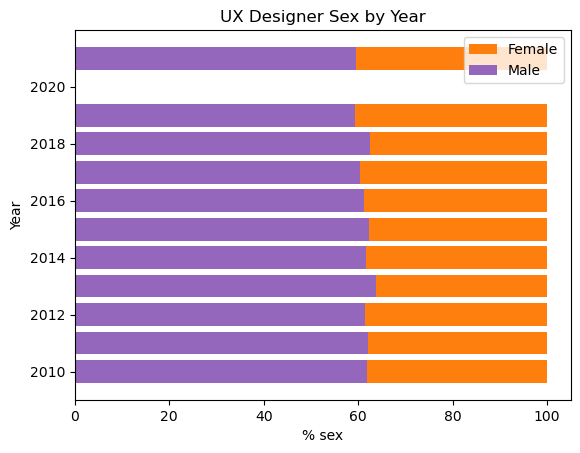

In [16]:
fig1, ax1 = plt.subplots()

for i, o in gbl_grouped:
    if o.sex.item() == 'Male':
        ax1.barh(o.Year, o.percent, left = 0, label = 'Male', color = 'tab:purple')
    else:
        start = 100 - o.percent
        ax1.barh(o.Year, o.percent, left = start, label = 'Female', color = 'tab:orange')
        
ax1.legend(['Female', 'Male'])
        
ax1.set(xlabel = '% sex', ylabel = 'Year', title = 'UX Designer Sex by Year')

plt.show()

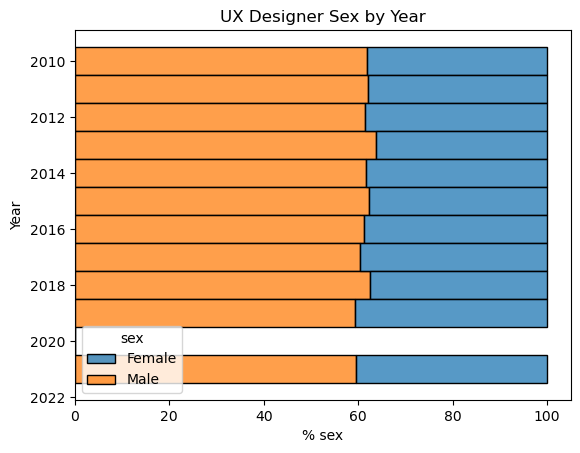

In [17]:
fig2, ax2 = plt.subplots()
sns.histplot(gb_l, y = 'Year', hue = 'sex', weights = 'percent', multiple = 'stack')
ax2.set_title('UX Designer Sex by Year')
ax2.set_xlabel('% sex')

plt.show()

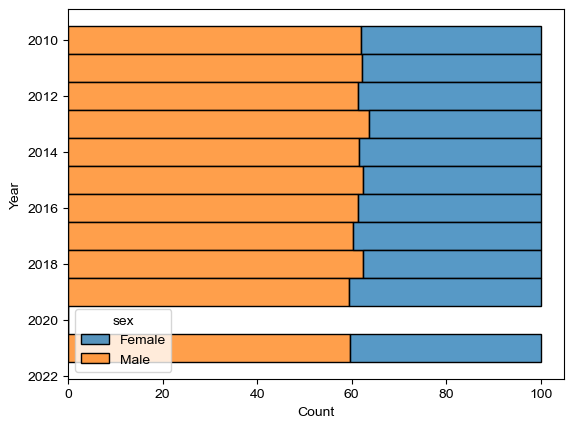

In [18]:
sns.histplot(gb_l, y = 'Year', hue = 'sex', weights = 'percent', multiple = 'stack')
sns.set_style('darkgrid')
plt.show()

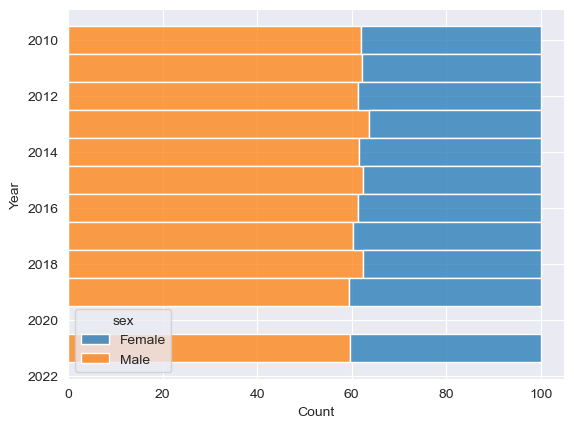

In [19]:
sns.histplot(gb_l, y = 'Year', hue = 'sex', weights = 'percent', multiple = 'stack')
sns.set_style('whitegrid')
plt.show()

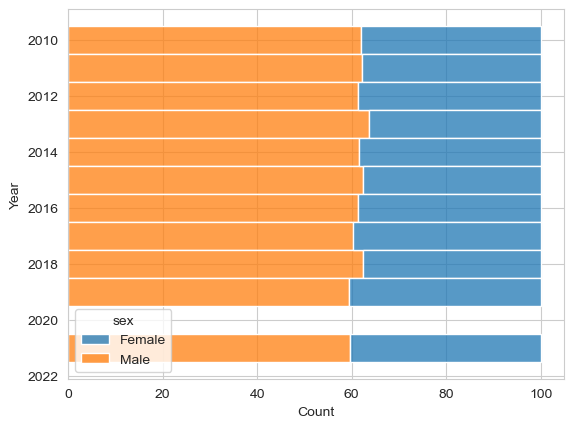

In [20]:
sns.histplot(gb_l, y = 'Year', hue = 'sex', weights = 'percent', multiple = 'stack')
sns.set_style('ticks')
plt.show()

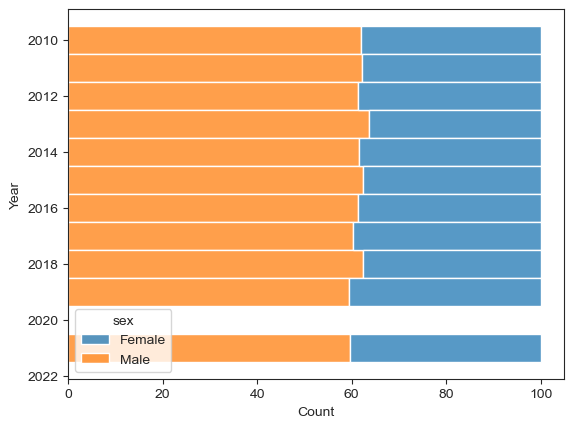

In [21]:
sns.histplot(gb_l, y = 'Year', hue = 'sex', weights = 'percent', multiple = 'stack')
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.color_palette('Set2')
plt.show()